![](http://i.imgur.com/JtmJTKc.png)

- <a href='#1'>1. Introduction</a>  
- <a href='#2'>2. Loading libraries and retrieving data</a>
- <a href='#3'>3. Understanding the Data</a>
- <a href='#4'>4. Missing Values</a>
- <a href='#5'>5.  Data Visualization</a>



# <a id='1'>1. Introduction</a>

**Background**

Mixed martial arts (MMA) is a full-contact combat sport that allows striking and grappling, both standing and on the ground, using techniques from other combat sports and martial arts. The Ultimate Fighting Championship (UFC) is an American mixed martial arts organization based in Las Vegas, Nevada and is the largest MMA promotion in the world and features the top-ranked fighters of the sport. Based in the United States, the UFC produces events worldwide that showcase twelve weight divisions and abide by the Unified Rules of Mixed Martial Arts. This is a highly unpredictable sport 

Few things we will try to visualize:

* How's Age/Height related to the outcome?
* Most popular locations in UFC?
* Most popular way to win the fight?
* Comparing techniques used by fighters

****
# <a id='2'>2. Loading libraries and retrieving data</a>

Not all python capabilities are loaded to your working environment by default. We would need to import every library we are going to use. We will choose alias names to our modules for the sake of convenience (e.g. numpy --> np, pandas --> pd)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from plotly.offline  import download_plotlyjs,init_notebook_mode,plot, iplot
import cufflinks as cf
init_notebook_mode(connected = True)
cf.go_offline()
%matplotlib inline

from plotly import tools
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.offline as offline


import warnings
warnings.filterwarnings('ignore')



df = pd.read_csv("data.csv")
df.head(2)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 894 entries, BPrev to winner
dtypes: float64(876), int64(9), object(9)
memory usage: 15.8+ MB


# <a id='3'>3. Understanding the data</a>

Dataset contains list of all UFC fights since 2013 with summed up entries of each fighter's round by round record preceding that fight. Created in the attempt to predict a UFC fight winner .  Each row represents a single fight - with each fighter's previous records summed up prior to the fight. Blank stats mean its the fighter's first fight since 2013 which is where granular data for UFC fights. 

We have about 895 columns, few important columns to note:

* BPrev: Previous fights by 'Blue' fighter
* B_Age: Age of 'Blue' fighter
* B_Height: Height of 'Blue' fighter
* B_Weight: Weight of 'Blue' fighter
* B_Location: Location of 'Blue' fighter
* B_Hometown: Hometown of 'Blue fighter
* RPrev: Previous fights by 'Red' fighter
* R_Age: Age of 'Red' fighter
* R_Height: Height of 'Red' fighter
* R_Weight: Weight of 'Red' fighter
* R_Location: Location of 'Red' fighter
* R_Hometown: Hometown of 'Red fighter
* Date: Date of the fight
* winby: How did the fighter win the fight (decision, submission KO etc.)
* winner: Who was the winner of the fight?

Apart from this, dataset contains all the techniques (punch, kicks, takedowns etc.) attempted and landed by the fighters in each round. 

In [8]:
df.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [9]:
df.describe(include="all")

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
count,2318.000000,2318.000000,2301.000000,2301.000000,2301,2318.000000,2305,2318,2306.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,2282,2318
unique,NaN,NaN,NaN,NaN,724,NaN,567,949,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4
top,NaN,NaN,NaN,NaN,Rio de Janeiro Brazil,NaN,Rio de Janeiro Brazil,Kevin Lee,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
freq,NaN,NaN,NaN,NaN,46,NaN,58,11,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1111,1327
mean,2.391286,0.744607,31.776184,177.327249,NaN,2120.001726,NaN,NaN,73.699480,0.074681,...,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704,NaN,NaN
std,2.539978,1.145596,4.165267,8.807620,NaN,705.089725,NaN,NaN,15.425347,0.305691,...,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078,NaN,NaN
min,0.000000,0.000000,20.000000,152.000000,NaN,129.000000,NaN,NaN,52.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,0.000000,29.000000,172.000000,NaN,1910.250000,NaN,NaN,61.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000,NaN,NaN
50%,2.000000,0.000000,31.000000,177.000000,NaN,2230.000000,NaN,NaN,70.000000,0.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000,NaN,NaN
75%,4.000000,1.000000,35.000000,182.000000,NaN,2709.000000,NaN,NaN,84.000000,0.000000,...,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000,NaN,NaN


In [10]:
print("Number of records : ", df.shape[0])
print("Number of Blue fighters : ", len(df.B_ID.unique()))
print("Number of Red fighters : ", len(df.R_ID.unique()))

Number of records :  2318
Number of Blue fighters :  942
Number of Red fighters :  835


In [11]:
df.isnull().sum(axis=0)

BPrev                                                       0
BStreak                                                     0
B_Age                                                      17
B_Height                                                   17
B_HomeTown                                                 17
B_ID                                                        0
B_Location                                                 13
B_Name                                                      0
B_Weight                                                   12
B__Round1_Grappling_Reversals_Landed                      671
B__Round1_Grappling_Standups_Landed                       671
B__Round1_Grappling_Submissions_Attempts                  671
B__Round1_Grappling_Takedowns_Attempts                    671
B__Round1_Grappling_Takedowns_Landed                      671
B__Round1_Strikes_Body Significant Strikes_Attempts       671
B__Round1_Strikes_Body Significant Strikes_Landed         671
B__Round


# <a id='4'>4. Missing Values</a>

We oberserve there are some missing values in our data.  I know Age and Height are important features in any combat sport and they have handful of missing values. 

We will address the missing values in age and height. We can simply delete rows with missing values, but usually we would want to take advantage of as many data points as possible. Replacing missing values with zeros would not be a good idea - as age 0 will have actual meanings and that would change our data.

Therefore a good replacement value would be something that doesn't affect the data too much, such as the median or mean. the "fillna" function replaces every NaN (not a number) entry with the given input (the mean of the column in our case). Let's do this for both 'Blue' and 'Red' fighters.

In [14]:
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))

# <a id='5'>5. Data Visualization</a>

Let's start by looking who's winning more from our dataset:

In [16]:
temp = df["winner"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Winner",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "Whos winning more",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

Here I will just follow my instinct and play around a bit with what I feel will matter.

Let's talk about Age - a critical factor in any sport. We will start by looking at the distribution of Age from our dataset

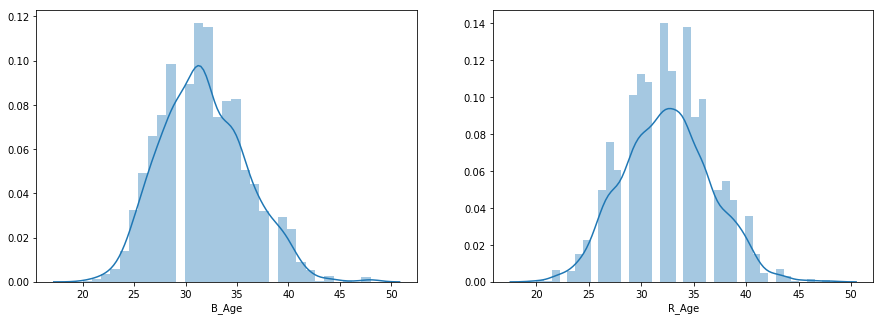

In [18]:
#fig, ax = plt.subplots(1,2, figsize=(12, 20))
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Age, ax=ax[0])
sns.distplot(df.R_Age, ax=ax[1])

Age is a big factor in any sport, moresoever in MMA where you must have combination of strength, agility and speed (among other skills). These skills peak at 27-35 and fighter's fighting at this age should have higher likelyhood of winning the fight. Let's validate by grouping age for Blue fighters who have won the fight. 

In [19]:
BAge = df.groupby(['B_Age']).count()['winner']
BlueAge = BAge.sort_values(axis=0, ascending=False)
BlueAge.head(10)

B_Age
31.0    245
32.0    224
29.0    206
30.0    187
35.0    173
34.0    171
28.0    158
33.0    156
27.0    138
36.0    106
Name: winner, dtype: int64

Clearly, most fights have been won by fighters in their late 20’s through early 30’s as they peak during this time and then lose strength, quickness and cardiovascular capacity

On the other hand, younger fighters do not develop peak strength till 27-28~ while older fighters are usually slower and more likely to lose. Let's check if this is true in our data. This time we will check for 'Red' fighters. 

In [20]:
RAge = df.groupby(['R_Age']).count()['winner']
RedAge = RAge.sort_values(axis=0, ascending=False)
RedAge.tail(10)

R_Age
43.0    12
22.0    11
23.0    10
42.0     8
44.0     5
46.0     3
48.0     2
20.0     2
45.0     1
21.0     1
Name: winner, dtype: int64

Looks like this is true. It makes me curious about the total number of Red and Blue fighters who are younger than 35. 

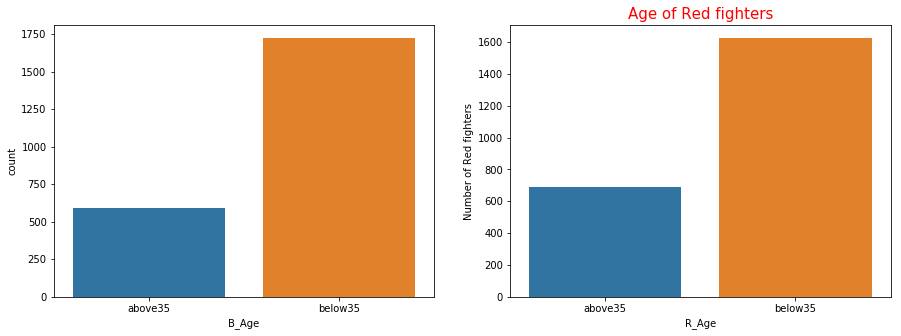

In [21]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
above35 =['above35' if i >= 35 else 'below35' for i in df.B_Age]
df_B = pd.DataFrame({'B_Age':above35})
sns.countplot(x=df_B.B_Age, ax=ax[0])
plt.ylabel('Number of fighters')
plt.title('Age of Blue fighters',color = 'blue',fontsize=15)

above35 =['above35' if i >= 35 else 'below35' for i in df.R_Age]
df_R = pd.DataFrame({'R_Age':above35})
sns.countplot(x=df_R.R_Age, ax=ax[1])
plt.ylabel('Number of Red fighters')
plt.title('Age of Red fighters',color = 'Red',fontsize=15)

Interestingly, most fighters are below 35. MMA is a brutal sport for older guys and can leave them with lifelong injuries. 

Lastly, let's look at the mean difference

In [23]:
df['Age_Difference'] = df.B_Age - df.R_Age
df[['Age_Difference', 'winner']].groupby('winner').mean()

,Age_Difference
winner,
blue,-1.789845
draw,-1.187500
no contest,-1.893579
red,0.161410


Age matters, and youth is a clear advantage. 

Height is also a major advantage in MMA as it means more the height more is the reach, meaning - taller fighter can attack from a distance keeping themselves safe from the hitting zone. Let's start by looking at the distribution of height:

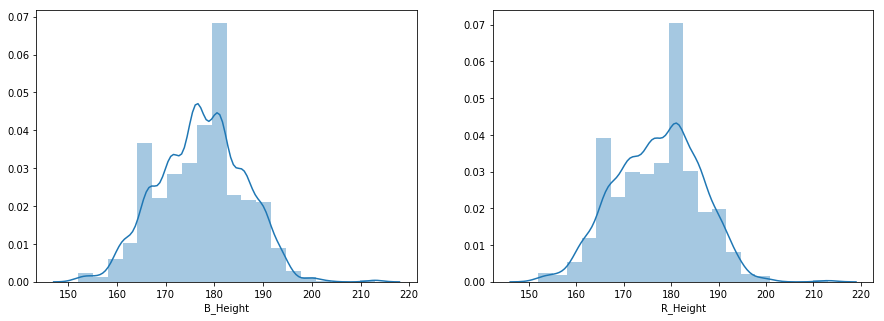

In [24]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df.B_Height, bins = 20, ax=ax[0]) #Blue 
sns.distplot(df.R_Height, bins = 20, ax=ax[1]) #Red

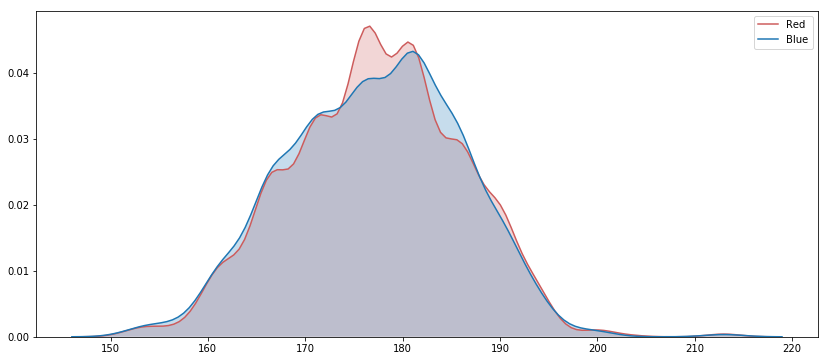

In [25]:
fig, ax = plt.subplots(figsize=(14, 6))
sns.kdeplot(df.B_Height, shade=True, color='indianred', label='Red')
sns.kdeplot(df.R_Height, shade=True, label='Blue')

In [26]:
df['Height Difference'] = df.B_Height - df.R_Height
df[['Height Difference', 'winner']].groupby('winner').mean()

,Height Difference
winner,
blue,0.304305
draw,2.437500
no contest,-0.172334
red,0.089707


Taller fighter has an advantage and, on average, wins. Of course, unless you are Rocky fighting Drago ;)

Now, let's talk about how the fighters are winning. The three most popular ways to win in an MMA fight are:

**1. DEC:**  Decision (Dec)  is a result of the fight or bout that does not end in a knockout in which the judges' scorecards are consulted to determine the winner; a majority of judges must agree on a result. A fight can either end in a win for an athlete, a draw, or a no decision.

**2. SUB: ** also referred to as a "tap out" or "tapping out" - is often performed by visibly tapping the floor or the opponent with the hand or in some cases with the foot, to signal the opponent and/or the referee of the submission

**3. KO/TKO:**  Knockout (KO) is when a fighter gets knocked out cold. (i.e.. From a standing to not standing position from receiving a strike.). Technical Knockout (TKO) is when a fighter is getting pummeled and is unable to defend him/herself further. The referee will step in and make a judgement call to end it and prevent the fighter from receiving any more unnecessary or permanent damage, and call it a TKO.

In [27]:
temp = df["winby"].value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      #"name": "Types of Loans",
      #"hoverinfo":"label+percent+name",
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"How the fighter's are winning?",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Win by",
                "x": 0.50,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

So most fights are going to the judges. Second most popular way is Knockout and the Technical KO.

Let's check how this is distibuted with respect to Age for 'Red' fighters.

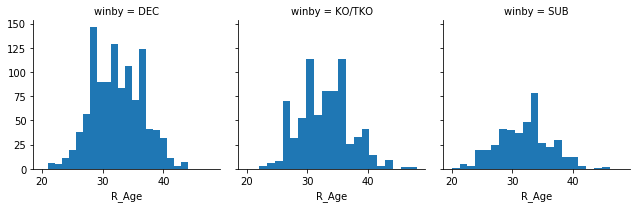

In [28]:
g = sns.FacetGrid(df, col='winby')
g.map(plt.hist, 'R_Age', bins=20)

MMA is a complex sport, in a sense it is the only sport where defense and offense could be done in the same movement. Hitting someone is a risk as it leaves you open for your opponent to counter. However, the *bigger the risk, the greater the reward*. More offensive attempts you make should mean more you land on your opponent (and with right skills and power - more chance you have to win the fight). 

Let's see if this is true with our data.

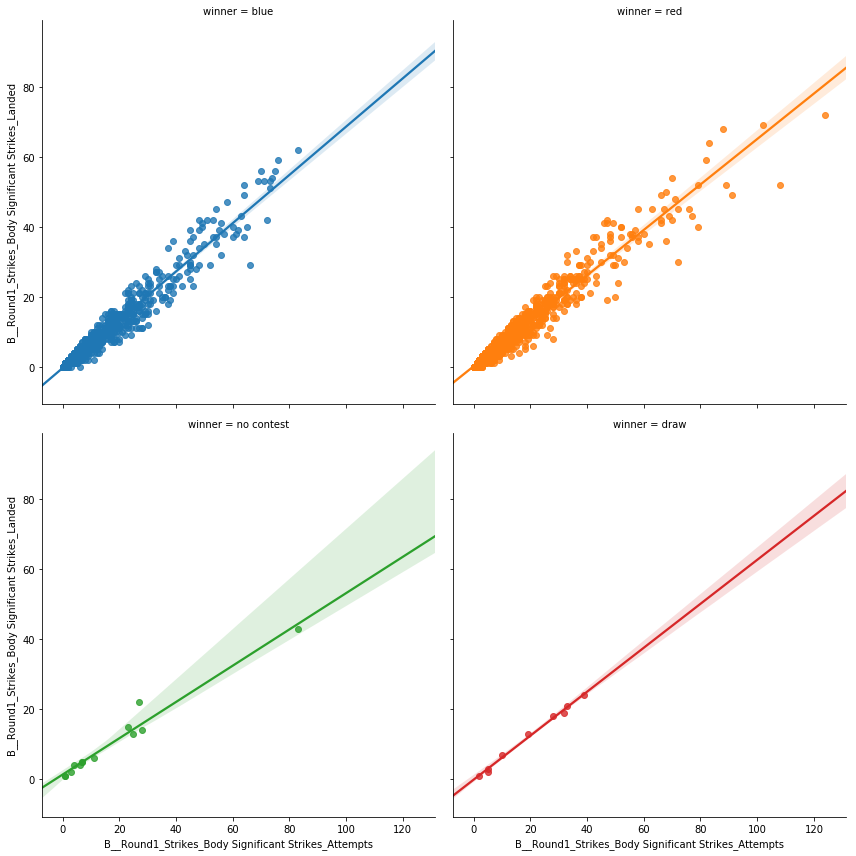

In [29]:
sns.lmplot(x="B__Round1_Strikes_Body Significant Strikes_Attempts", 
               y="B__Round1_Strikes_Body Significant Strikes_Landed", 
               col="winner", hue="winner", data=df, col_wrap=2, size=6)

Attempts and strikes landed are, as expected, perfectly linear.

Now, let's look at the location and find out most popular countries

In [31]:
cnt_srs = df['R_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular cities for Red fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

In [32]:
cnt_srs = df['B_Location'].value_counts().head(15)

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
    ),
)

layout = go.Layout(
    title='Most Popular cities for Blue fighters'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig, filename="Ratio")

MMA seems to be most prominent in Brazil and USA. Infact, MMA is second most popular sport after Soccer in Brazil. I wonder if it is due to ancient Brazilian Jiu-Jitsu?

Now, let's look at the Grappling reversals, grappling standups and grappling takedowns landed in different weight categories in** Round 1**

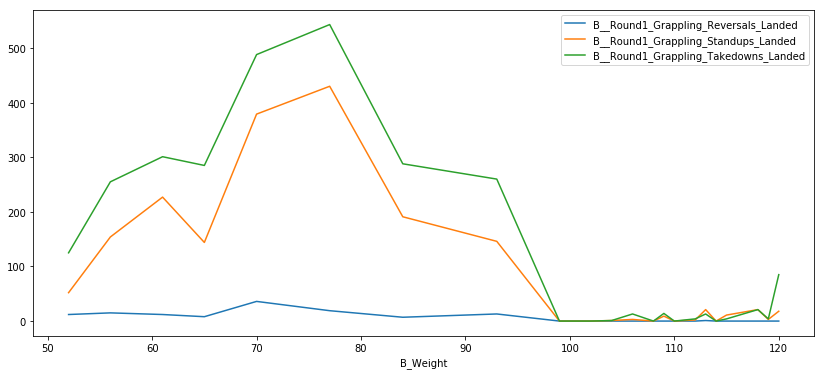

In [33]:
r1 = df[['B_Weight', 'B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed', 
    'B__Round1_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

r1.plot(kind='line', figsize=(14,6))
plt.show()

There are very few Grappling reversals but high amount of Grappling takedowns that were landed. More specifically weight classes between 70 - 80 prefer takedowns during Round 1. 

Let's compare the same for Round 5

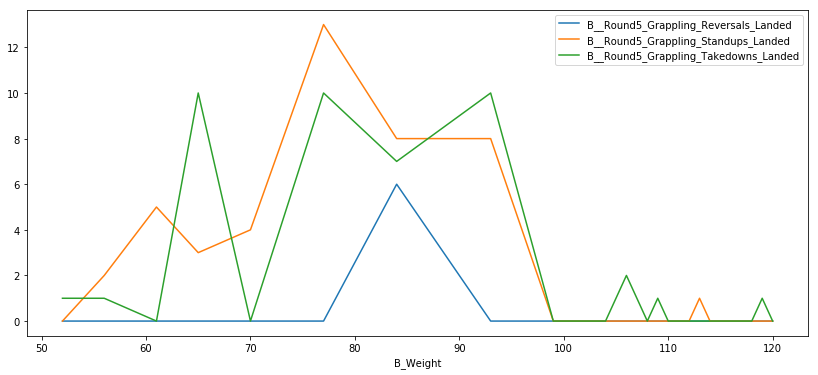

In [34]:
r5 = df[['B_Weight', 'B__Round5_Grappling_Reversals_Landed', 'B__Round5_Grappling_Standups_Landed', 'B__Round5_Grappling_Takedowns_Landed']].groupby('B_Weight').sum()

r5.plot(kind='line', figsize=(14,6))
plt.show()

Interestingly, grappling reversals increase for fighters between weight 80-90, while takedowns have decreased in the lighter weight groups.

Lets look similar data for Clinch head strikes, Clinch leg strikes and Body strikes for Round 1

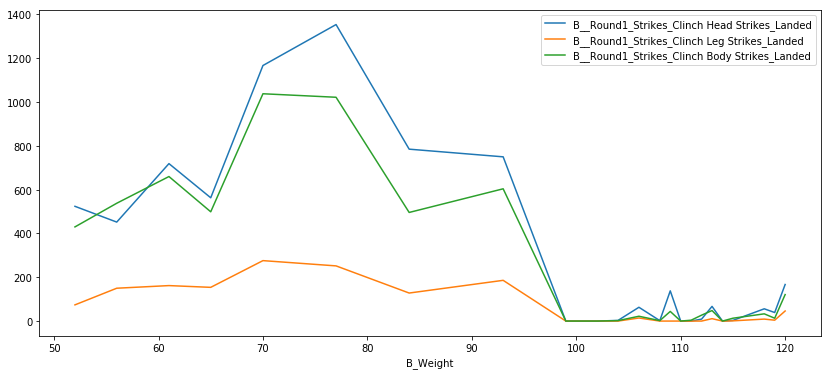

In [35]:
clin_r1 = df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round1_Strikes_Clinch Leg Strikes_Landed', 'B__Round1_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

clin_r1.plot(kind='line', figsize=(14,6))
plt.show()

Fighters prefer to land  more head strikes during round 1, let's compare this with what happens in Round 5:

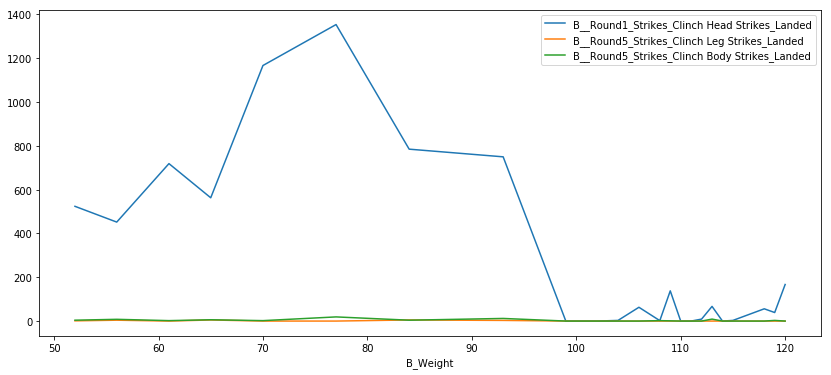

In [36]:
clin_r5= df[['B_Weight', 'B__Round1_Strikes_Clinch Head Strikes_Landed', 'B__Round5_Strikes_Clinch Leg Strikes_Landed', 'B__Round5_Strikes_Clinch Body Strikes_Landed']].groupby('B_Weight').sum()

clin_r5.plot(kind='line', figsize=(14,6))
plt.show()

By Round 5, fighters (who are now worn-out)  are hardly landing any leg and body strike. They are still landing good amount of Head strikes. This makes sense as the fight is coming to an end and instead of depending on the judges, they want to go for a Knock out. 

*More to come! **Stay tuned!***